# 06 Machine Learning
Logistic regression and randon forest models are used to predict the divorce of male and female actors.

I analyed seperated data from male and female found that the sex does no have a significant contribution to the divorce. Therefore, I combine all actor and actress data and perform ML model. 


In [194]:
# Data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns
import ast


# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier

#from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [195]:
#import pandas as pd
df_X = pd.read_csv('export_df_X_forML.csv')
df_y = pd.read_csv('export_df_y_forML.csv')
# male data
df_X_M = pd.read_csv('export_df_X_M_forML.csv')
df_y_M = pd.read_csv('export_df_y_M_forML.csv')
# female data
df_X_F = pd.read_csv('export_df_X_F_forML.csv')
df_y_F = pd.read_csv('export_df_y_F_forML.csv')

# remove data
df_X = df_X.drop(["Unnamed: 0"], axis = 1)
df_y = df_y.drop(["Unnamed: 0"], axis = 1)
df_X_M = df_X_M.drop(["Unnamed: 0"], axis = 1)
df_y_M = df_y_M.drop(["Unnamed: 0"], axis = 1)
df_X_F = df_X_F.drop(["Unnamed: 0"], axis = 1)
df_y_F = df_y_F.drop(["Unnamed: 0"], axis = 1)

In [196]:
df_X.columns

Index(['age', 'age_diff', 'zodiac', 'zodiac_sp', 'num_of_child_cl',
       'num_of_child_sp_cl', 'num_of_role', 'num_of_role_sp', 'geo_distance',
       'age_m_1', 'age_m_sp_1', 'sex'],
      dtype='object')

rename the feature columns

In [197]:
df_X.rename(columns = {'age_diff':'age difference', 'zodiac_sp':'zodiac (spouse)', 
             'num_of_child_cl':'num of child', 'num_of_child_sp_cl':'num of child (spouse)',
            'num_of_role':'num of role', 'num_of_role_sp': 'num of role (spouse)',
            'geo_distance': 'geo distance', 'age_m_1':'age at 1st marriage', 
             'age_m_sp_1': 'age at 1st marriage (spouse)'}, inplace=True)

## Standardization
Use Standardization to linear model to make algorithm less senstive to outlier

In [198]:
# Initialize a scaler, then apply it to the features
scaler = StandardScaler()

df_X_ss = scaler.fit_transform(df_X)
df_X_M_ss = scaler.fit_transform(df_X_M)
df_X_F_ss = scaler.fit_transform(df_X_F)

Split data

In [199]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(df_X_ss, df_y, test_size = 0.3, random_state = 12)

# seperated male and female dataset
X_M_train, X_M_test, y_M_train, y_M_test = train_test_split(df_X_M_ss, df_y_M, test_size = 0.3, random_state = 32)
X_F_train, X_F_test, y_F_train, y_F_test = train_test_split(df_X_F_ss, df_y_F, test_size = 0.3, random_state = 32)

# Show the results of the split
print("Training set for total has {} samples.".format(X_train.shape[0]))
print("Testing set for total has {} samples.".format(X_test.shape[0]))

Training set for total has 2163 samples.
Testing set for total has 927 samples.


## Logistic regression
Use grid search to find the optimized hyperparameter

In [200]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create regularization penalty space
penalty = ['l1', 'l2']
# Create regularization hyperparameter space
C = np.logspace(-3, 10, 20)
solver = ['liblinear', 'saga']
#multi_class = ['ovr']
# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty, solver = solver)

# Create logistic regression
lr_model = LogisticRegression(random_state=32) # Instantiate

# Create grid search using 5-fold cross validation
clf = GridSearchCV(lr_model, hyperparameters, cv=5, verbose=0)

In [203]:
# Fit grid search
best_lr_model = clf.fit(X_train, y_train) #Fit

y_test_preds_lr = best_lr_model.predict(X_test) 

print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(clf.best_score_))
# View best hyperparameters
print('Best Penalty:', best_lr_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_lr_model.best_estimator_.get_params()['C'])
print('Best Model:', best_lr_model.best_estimator_)

Accuracy of logistic regression classifier on test set: 0.7245
Best Penalty: l2
Best C: 0.004832930238571752
Best Model: LogisticRegression(C=0.004832930238571752, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=32,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


In [204]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix = confusion_matrix(y_test, y_test_preds_lr)
print(confusion_matrix)

[[273 143]
 [127 384]]


In [205]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_preds_lr))
print(classification_report(y_test, y_test_preds_lr))

              precision    recall  f1-score   support

         0.0       0.68      0.66      0.67       416
         1.0       0.73      0.75      0.74       511

   micro avg       0.71      0.71      0.71       927
   macro avg       0.71      0.70      0.70       927
weighted avg       0.71      0.71      0.71       927

              precision    recall  f1-score   support

         0.0       0.68      0.66      0.67       416
         1.0       0.73      0.75      0.74       511

   micro avg       0.71      0.71      0.71       927
   macro avg       0.71      0.70      0.70       927
weighted avg       0.71      0.71      0.71       927



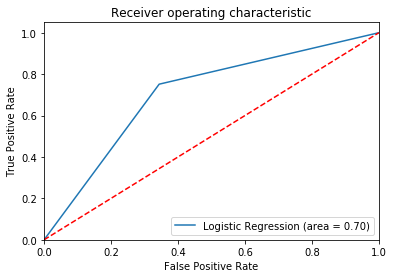

In [209]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc= roc_auc_score(y_test, best_lr_model.predict(X_test) )

fpr, tpr, thresholds = roc_curve(y_test, best_lr_model.predict(X_test))

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Random forest
Use grid search anc cross validation to find the optimized hyperparameter

In [210]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 50, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4, 8, 10]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               #'criterion': criterion,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 7, 12, 18, 23, 28, 34, 39, 44, 50, None], 'min_samples_split': [2, 5, 10, 20], 'min_samples_leaf': [2, 4, 8, 10], 'bootstrap': [True, False]}


### Random search training
Instantiate the random search and fit. 

**1.** Use the random grid to search for best hyperparameters. Search across 100 different combinations, and use all available cores

In [212]:
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation, 
rf_model = RandomizedSearchCV(estimator = rf_model, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_model.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 10.4min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 7, 12, 18, 23, 28, 34, 39, 44, 50, None], 'min_samples_split': [2, 5, 10, 20], 'min_samples_leaf': [2, 4, 8, 10], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [214]:
print('Best Parameters:', rf_model.best_params_)
print('Best Model:', rf_model.best_estimator_)

Best Parameters: {'n_estimators': 1600, 'min_samples_split': 20, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}
Best Model: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=20,
           min_weight_fraction_leaf=0.0, n_estimators=1600, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


In [215]:
from sklearn.metrics import accuracy_score
best_rf_model= rf_model.best_estimator_
y_train_pred_rf= best_rf_model.predict(X_train).round()
y_test_pred_rf= best_rf_model.predict(X_test).round()
accuracy = accuracy_score(y_test, y_test_pred_rf)

print('Accuracy of random forest classifier on train set: {:.2f}'.format(accuracy_score(y_train, y_train_pred_rf)))
print('Accuracy of random forest classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_test_pred_rf)))

Accuracy of random forest classifier on train set: 0.82
Accuracy of random forest classifier on test set: 0.72


In [216]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix = confusion_matrix(y_test, y_test_pred_rf)
print(confusion_matrix)

[[273 143]
 [118 393]]


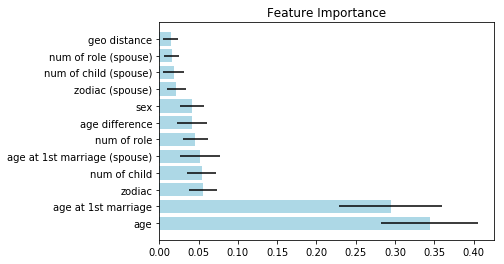

In [217]:
# feature importance
importance = best_rf_model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importance)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [df_X.columns[i] for i in indices]
std = np.std([tree.feature_importances_ for tree in best_rf_model.estimators_], axis=0)

# Create plot
fig, ax = plt.subplots()
#plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
ax.barh(range(df_X.shape[1]), importance[indices], xerr=std[indices], align='center', color='lightblue', ecolor='black')

# Add feature names as y-axis labels
plt.yticks(range(df_X.shape[1]), names, rotation=0)

# Show plot
plt.show()

Learning:
- Age, age of the first marrage are the most important feautres
- Sex is acturally not a very important contrintor to determine the devorce
- Number of child and number of role are not very important features
- Geo distance between spouses are least important feature

Next, we look at the data of male and female actors seperately

**1.** Male actor data

In [ ]:
rf_model = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random_M = RandomizedSearchCV(estimator = rf_model, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random_M.fit(X_M_train, y_M_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.8min


In [107]:
from sklearn.metrics import accuracy_score
best_rf_model_M = rf_random_M.best_estimator_
y_train_pred_rf_M = best_rf_model_M.predict(X_M_train).round()
y_test_pred_rf_M = best_rf_model_M.predict(X_M_test).round()

print('Accuracy of random forest classifier on train set (Male): {:.2f}'.format(accuracy_score(y_M_train, y_train_pred_rf_M)))
print('Accuracy of random forest classifier on test set (Male): {:.2f}'.format(accuracy_score(y_M_test, y_test_pred_rf_M)))

Accuracy of random forest classifier on train set (Male): 0.81
Accuracy of random forest classifier on test set (Male): 0.70


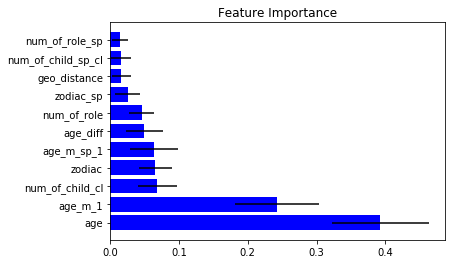

In [172]:
importanceM = best_rf_model_M.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importanceM)[::-1]

# Rearrange feature names so they match the sorted feature importances
names_M = [df_X_M.columns[i] for i in indices]
std = np.std([tree.feature_importances_ for tree in best_rf_model_M.estimators_], axis=0)

# Create plot
fig, ax = plt.subplots()
#plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
ax.barh(range(df_X_M.shape[1]), importanceM[indices], xerr=std[indices], align='center', color='lightblue', ecolor='black')

# Add feature names as y-axis labels
plt.yticks(range(df_X_M.shape[1]), names_M, rotation=0)

# Show plot
plt.show()

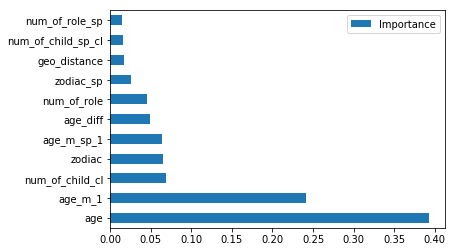

In [110]:
# feature importance

importanceM = best_rf_model_M.feature_importances_
importanceM = pd.DataFrame(importanceM, index=df_X_M.columns, columns=["Importance"])

importanceM = importanceM.sort_values(by = 'Importance', ascending=False).head(12) #.sort_values(by='col1', ascending=False)
importanceM.plot(kind='barh')

**3.** Female data

In [111]:
from sklearn.ensemble import RandomForestClassifier
#rfF= RandomForestClassifier(n_estimators= 200, min_samples_split= 5, min_samples_leaf= 4, 
#                           max_features= 'auto', max_depth= 10, bootstrap= True)
rf_random_F = RandomizedSearchCV(estimator = rf_model, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

rf_random_F.fit(X_F_train, y_F_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.1min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 7, 12, 18, 23, 28, 34, 39, 44, 50, None], 'min_samples_split': [2, 5, 10, 20], 'min_samples_leaf': [2, 4, 8, 10], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [112]:
print('Best Parameters:', rf_random_F.best_params_)
print('Best Model:', rf_random_F.best_estimator_)

Best Parameters: {'n_estimators': 600, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 39, 'bootstrap': True}
Best Model: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=39,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


In [113]:
from sklearn.metrics import accuracy_score
best_rf_model_F = rf_random_F.best_estimator_
y_train_pred_rf_F = best_rf_model_F.predict(X_F_train).round()
y_test_pred_rf_F = best_rf_model_F.predict(X_F_test).round()

print('Accuracy of random forest classifier on train set (Male): {:.2f}'.format(accuracy_score(y_F_train, y_train_pred_rf_F)))
print('Accuracy of random forest classifier on test set (Male): {:.2f}'.format(accuracy_score(y_F_test, y_test_pred_rf_F)))

Accuracy of random forest classifier on train set (Male): 0.87
Accuracy of random forest classifier on test set (Male): 0.76


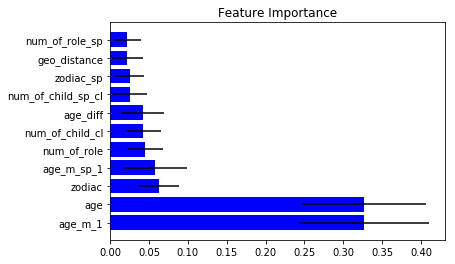

In [175]:
importanceF = best_rf_model_F.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importanceF)[::-1]

# Rearrange feature names so they match the sorted feature importances
names_F = [df_X_F.columns[i] for i in indices]
std = np.std([tree.feature_importances_ for tree in best_rf_model_F.estimators_], axis=0)

# Create plot
fig, ax = plt.subplots()
#plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
ax.barh(range(df_X_F.shape[1]), importanceF[indices], xerr=std[indices], align='center', color='blue', ecolor='black')

# Add feature names as y-axis labels
plt.yticks(range(df_X_F.shape[1]), names_F, rotation=0)

# Show plot
plt.show()

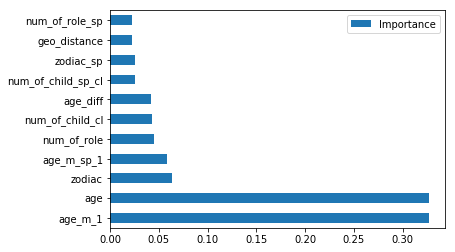

In [114]:
# feature importance

importanceF = best_rf_model_F.feature_importances_
importanceF = pd.DataFrame(importanceF, index=df_X_F.columns, columns=["Importance"])
importanceF = importanceF.sort_values(by = 'Importance', ascending=False).head(12) #.sort_values(by='col1', ascending=False)
#importance.head()
importanceF.plot(kind='barh')

Evaluation of random search

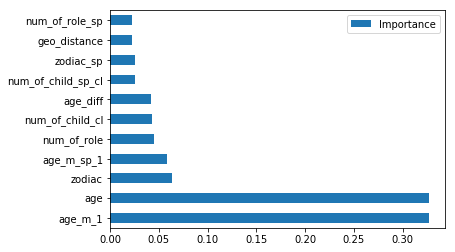

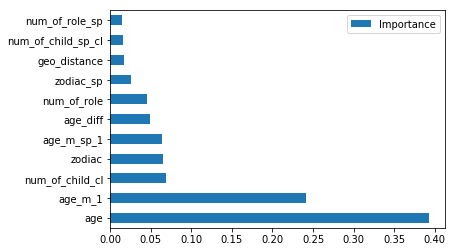

In [123]:
#fig, (ax1, ax2) = plt.subplots(1, 2)
#fig.suptitle('Feature importance (M vs F)')

#ax1.barh(importanceF.index, importanceF['importance'], align='center',color='green', ecolor='black')
importanceF.plot(kind='barh')
importanceM.plot(kind='barh')